In [1]:
import pandas as pd
print("✅ PANDA OK!")


✅ PANDA OK!


In [11]:
df = pd.read_csv("./../data/Sample-Superstore.csv", nrows=5000, encoding='latin1')
print(f"✅ Shape: {df.shape}")
print("Colonne:", df.columns.tolist())
df.head(3)


✅ Shape: (5000, 21)
Colonne: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [12]:
print("📊 Info:")
df.info()
print("\n❌ Missing:", df.isnull().sum().sum())
print("\n💰 Stats:")
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].describe())


📊 Info:
<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         5000 non-null   int64  
 1   Order ID       5000 non-null   str    
 2   Order Date     5000 non-null   str    
 3   Ship Date      5000 non-null   str    
 4   Ship Mode      5000 non-null   str    
 5   Customer ID    5000 non-null   str    
 6   Customer Name  5000 non-null   str    
 7   Segment        5000 non-null   str    
 8   Country        5000 non-null   str    
 9   City           5000 non-null   str    
 10  State          5000 non-null   str    
 11  Postal Code    5000 non-null   int64  
 12  Region         5000 non-null   str    
 13  Product ID     5000 non-null   str    
 14  Category       5000 non-null   str    
 15  Sub-Category   5000 non-null   str    
 16  Product Name   5000 non-null   str    
 17  Sales          5000 non-null   float64
 18  Quantity   

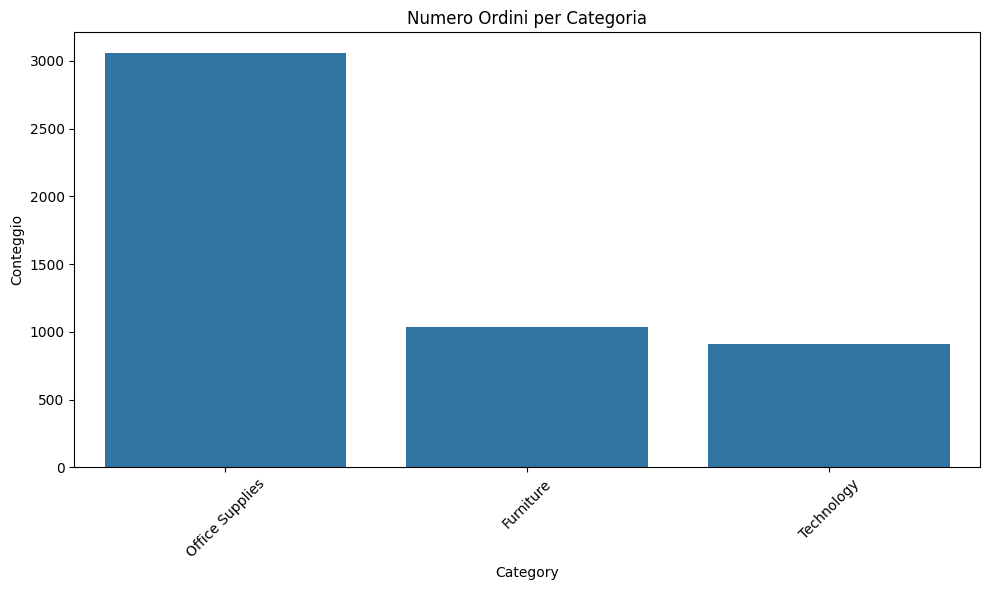

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Numero Ordini per Categoria')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


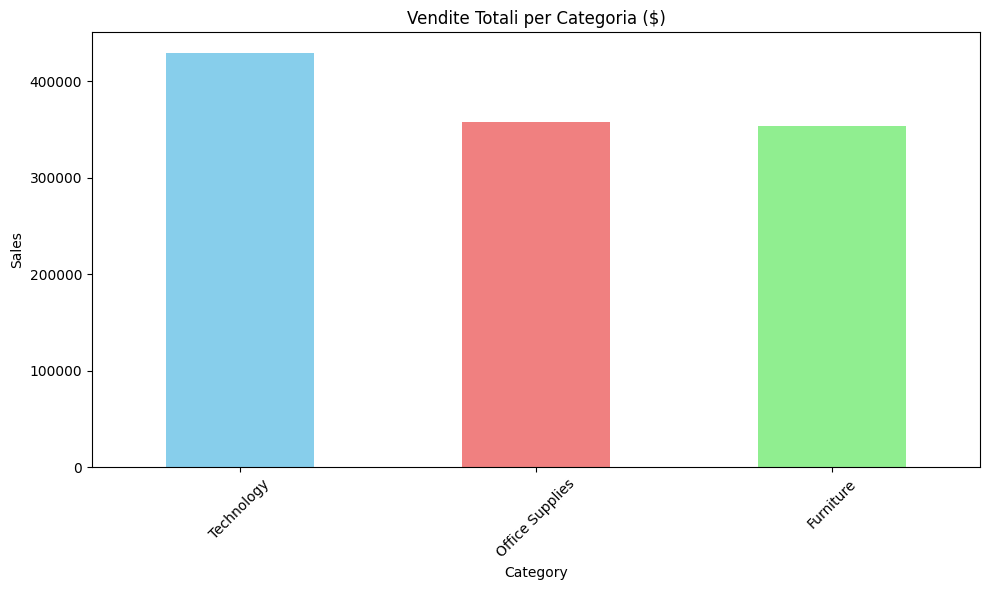

Top categoria vendite: Technology


In [14]:
sales_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sales_cat.plot(kind='bar', color=['skyblue','lightcoral','lightgreen'])
plt.title('Vendite Totali per Categoria ($)')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Top categoria vendite:", sales_cat.index[0])

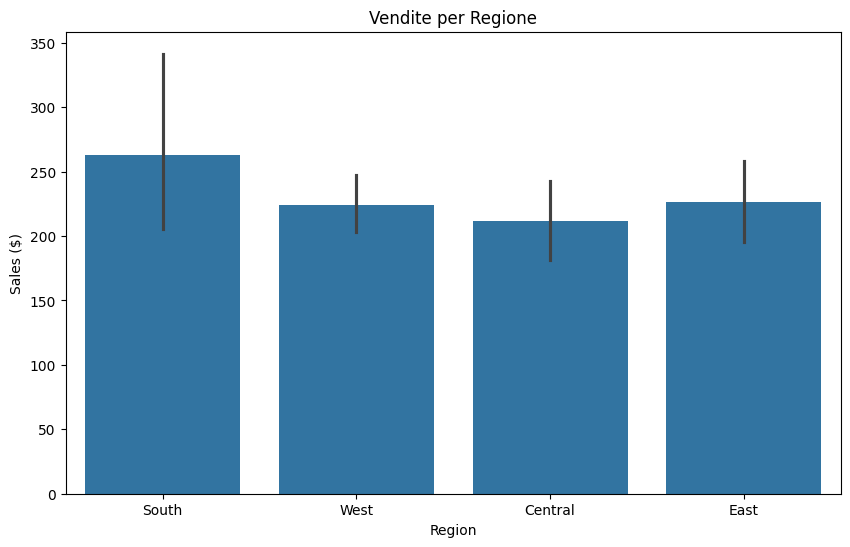

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Sales')
plt.title('Vendite per Regione')
plt.ylabel('Sales ($)')
plt.show()


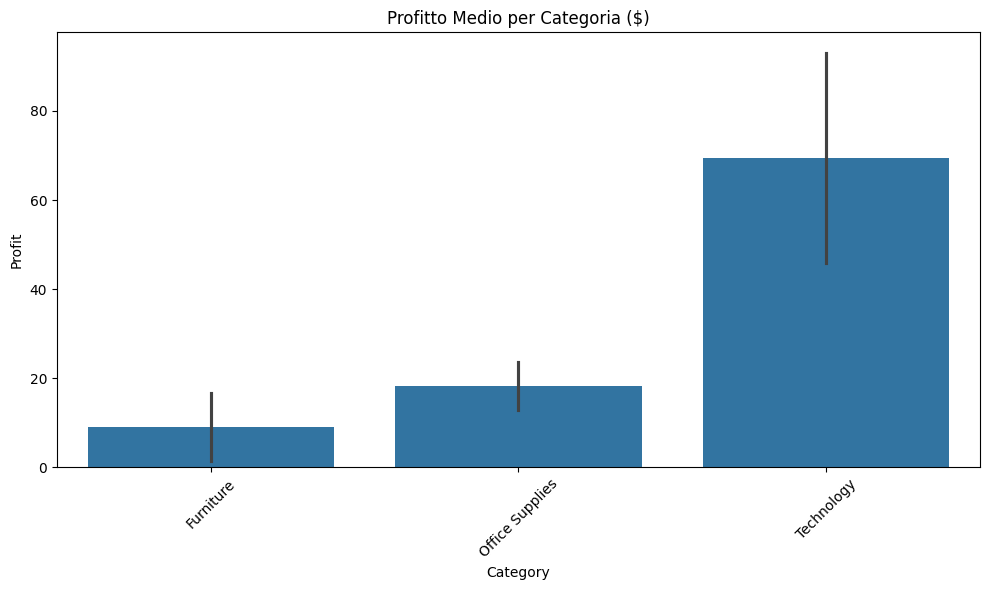

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Profit')
plt.title('Profitto Medio per Categoria ($)')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

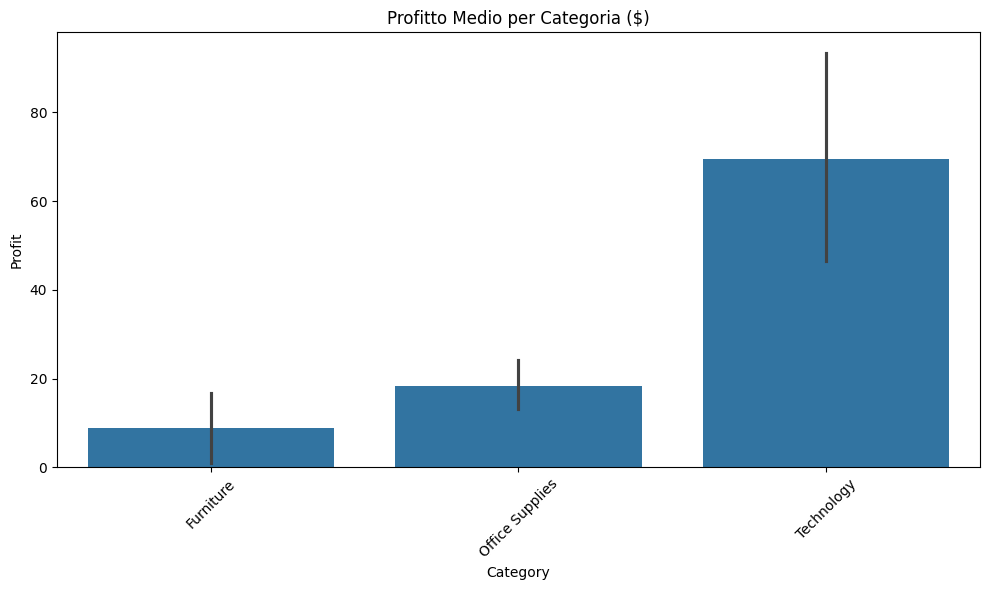

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Profit')
plt.title('Profitto Medio per Categoria ($)')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
print("🔍 INSIGHT PRINCIPALI:")
print("1. Technology ha più vendite totali ma Office Supplies più ordini")
print("2. West è la regione con più vendite")
print("3. [Aggiungi dal tuo grafico profitto, es. Furniture perde di più]")
print("\n📊 Dataset pulito: no missing values")
print(f"Periodo: {df['Order Date'].min()} - {df['Order Date'].max()}")

🔍 INSIGHT PRINCIPALI:
1. Technology ha più vendite totali ma Office Supplies più ordini
2. West è la regione con più vendite
3. [Aggiungi dal tuo grafico profitto, es. Furniture perde di più]

📊 Dataset pulito: no missing values
Periodo: 2014-01-04 00:00:00 - 2017-12-30 00:00:00
